# Customer Churning Prediction

Importing necessary Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,recall_score



In [ ]:
df = pd.read_csv('Churn Modeling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Understand the data

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# DATA VISUALIZATION

In [ ]:
sns.pairplot(data=df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

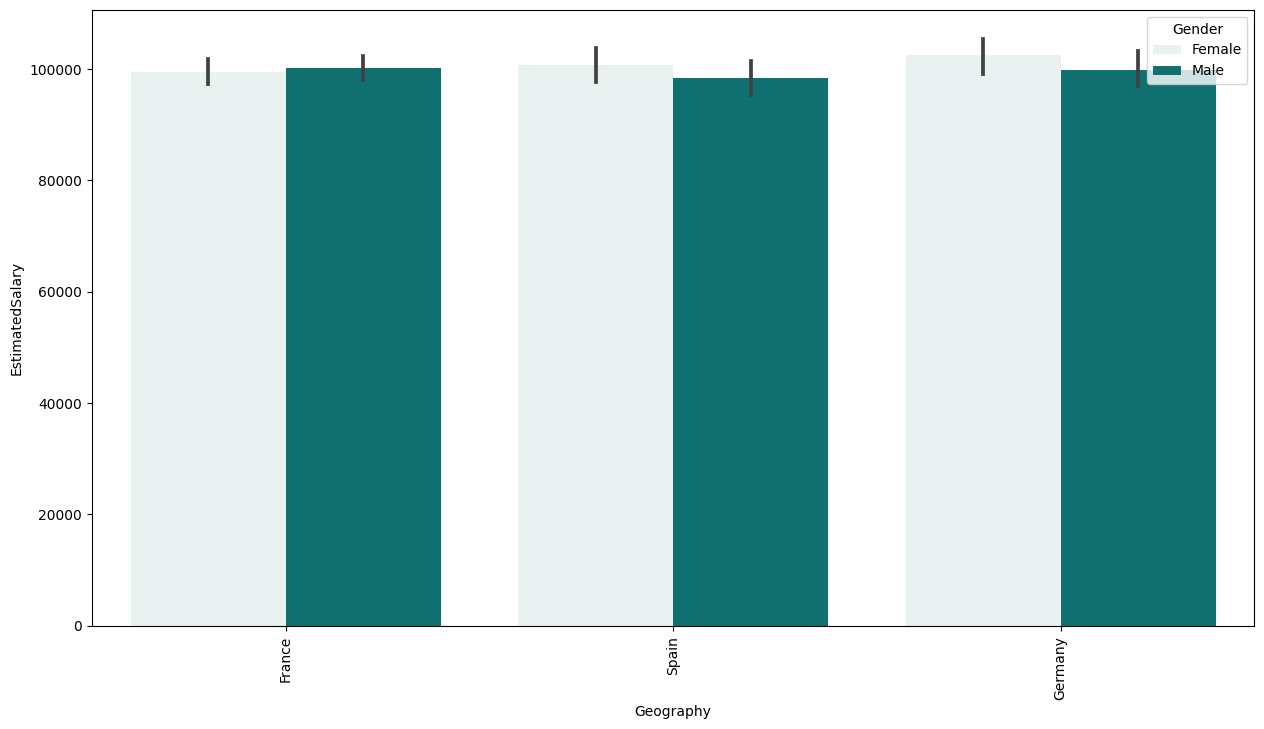

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='Geography',y='EstimatedSalary',hue='Gender',color='teal',data= df)
plt.show()

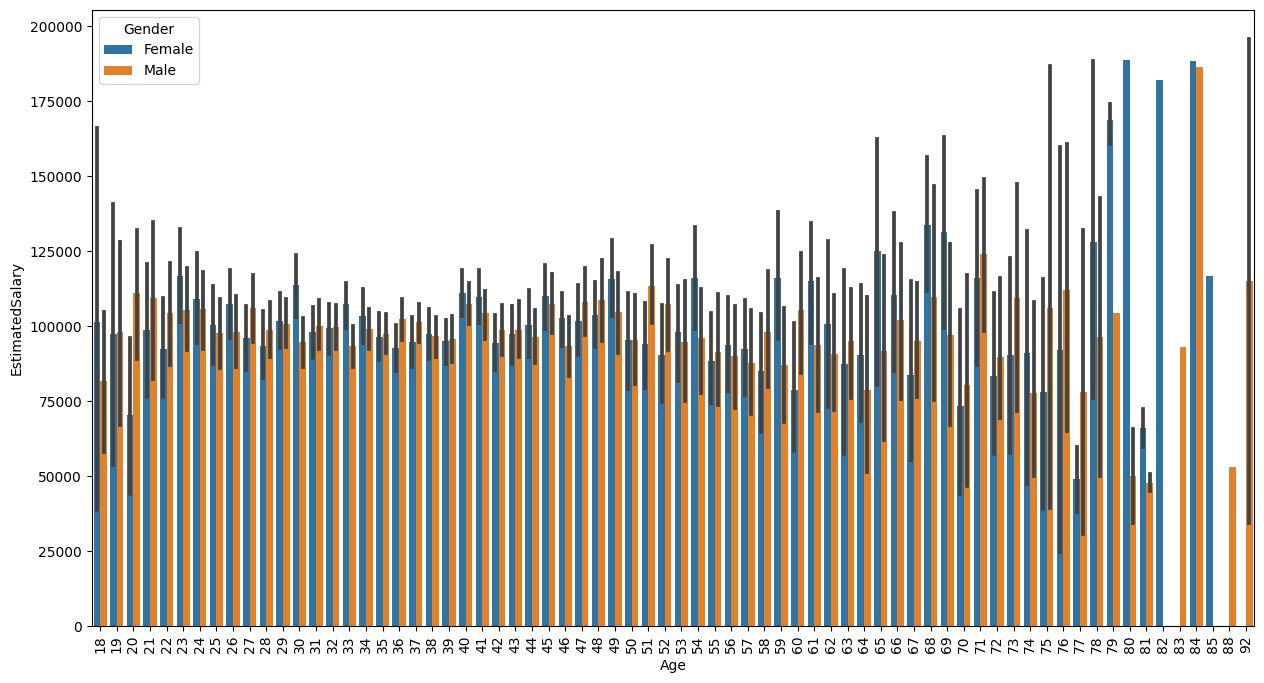

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='EstimatedSalary',hue='Gender',data= df)
plt.show()

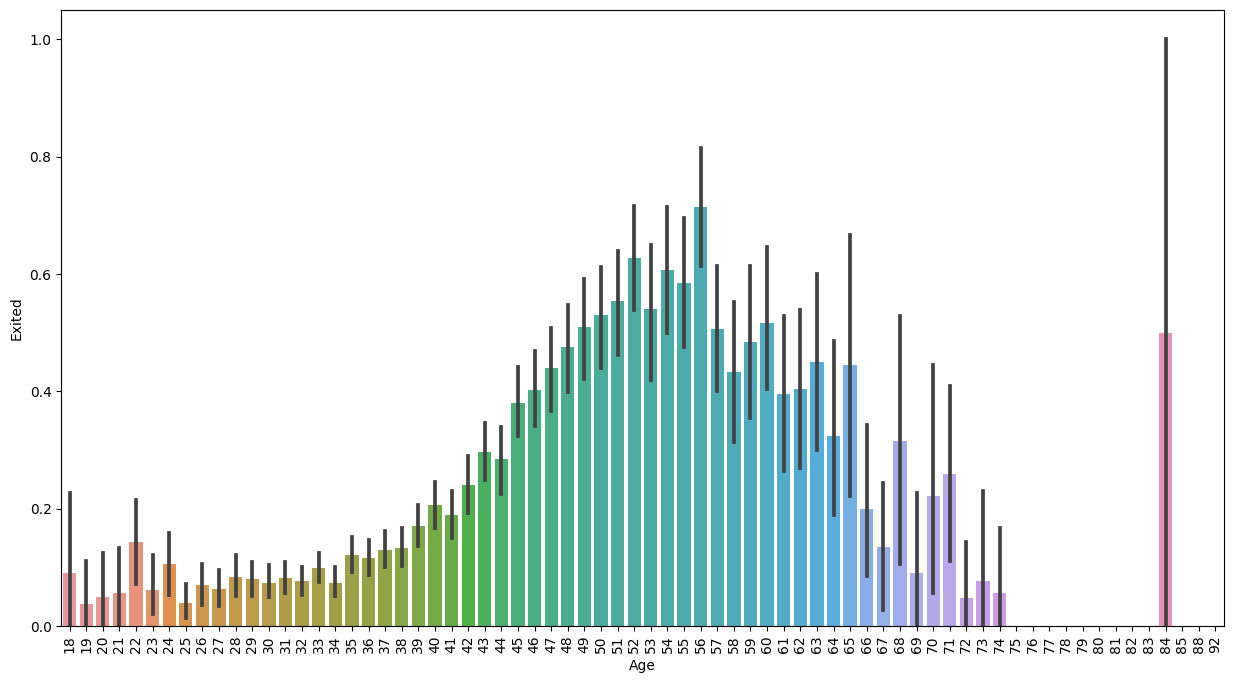

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='Exited',data= df)
plt.show()

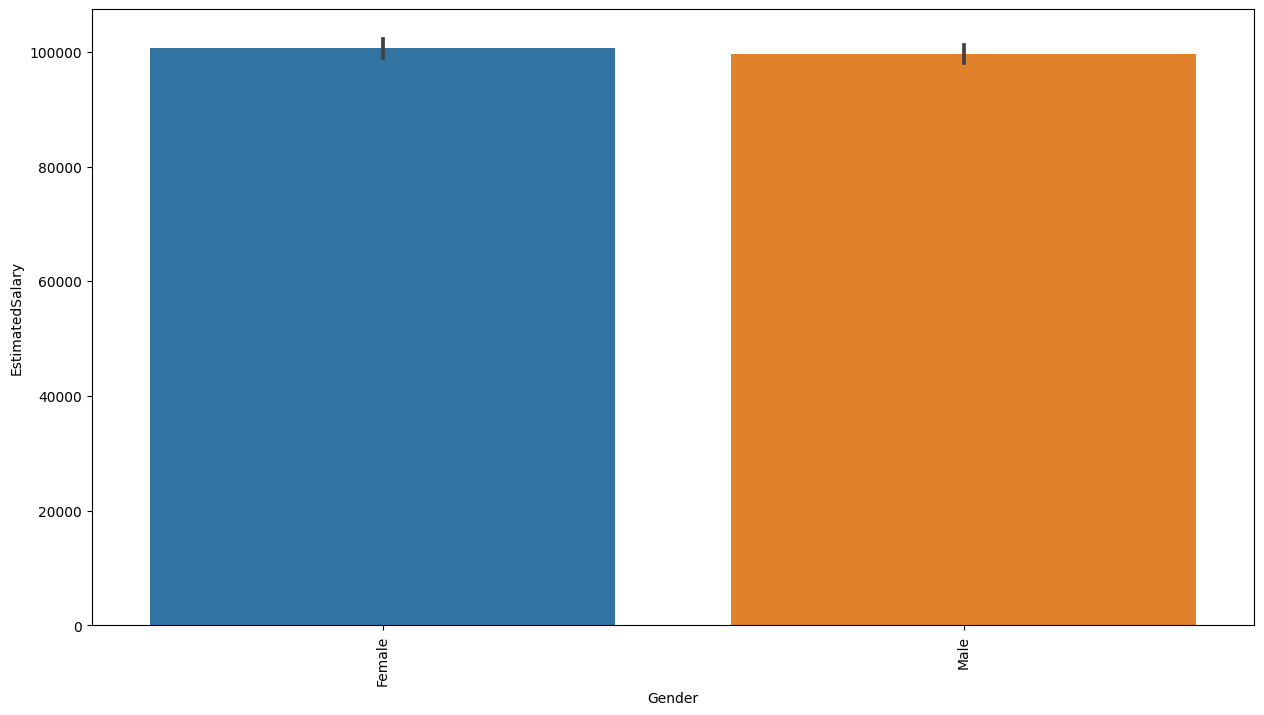

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='Gender',y='EstimatedSalary',data= df)
plt.show()

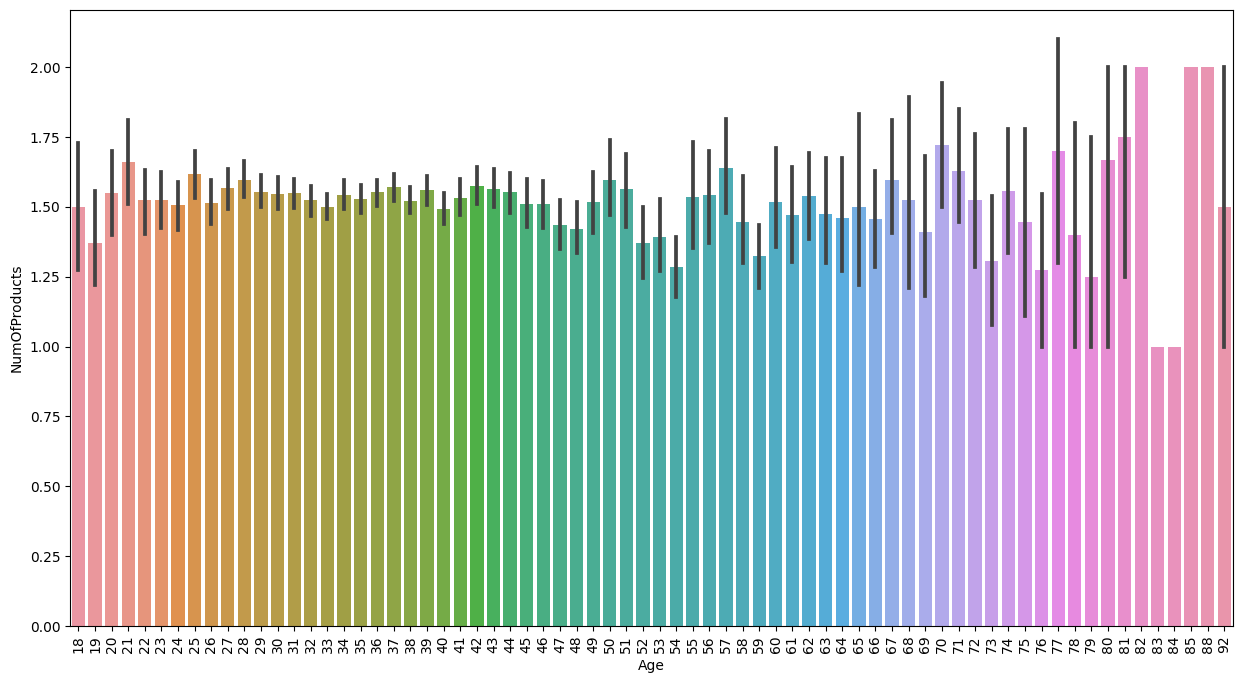

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='NumOfProducts',data= df)
plt.show()

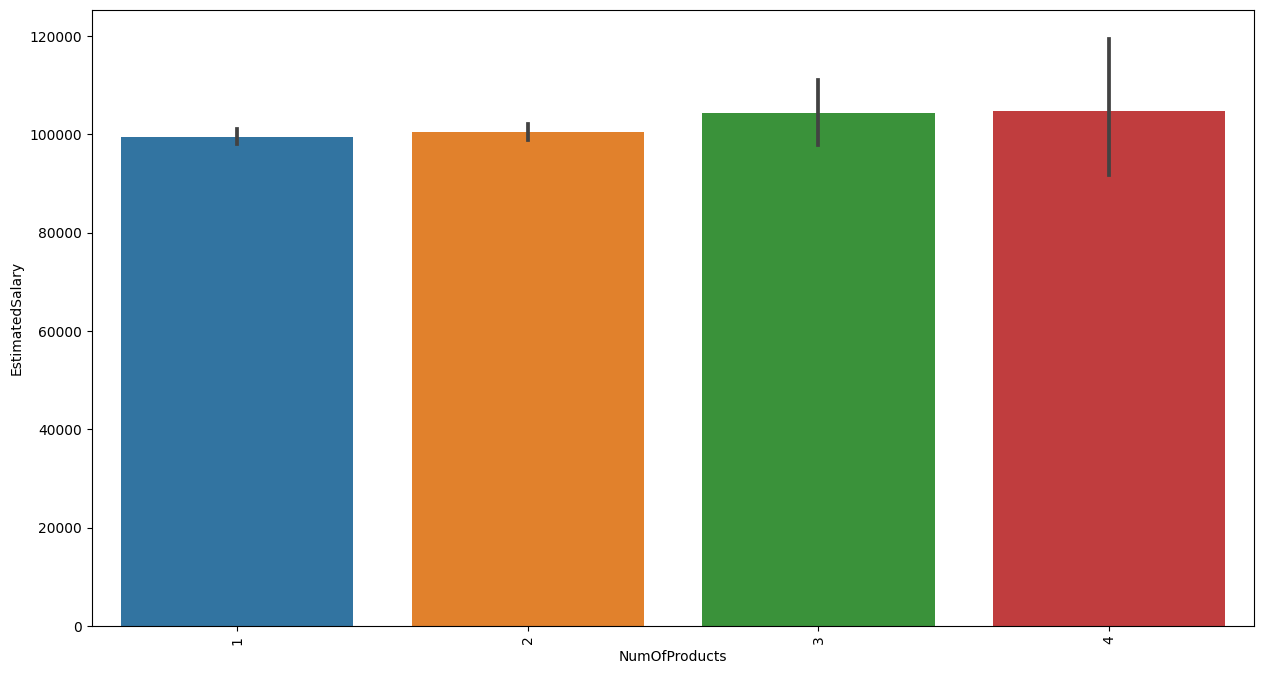

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='NumOfProducts',y='EstimatedSalary',data= df)
plt.show()

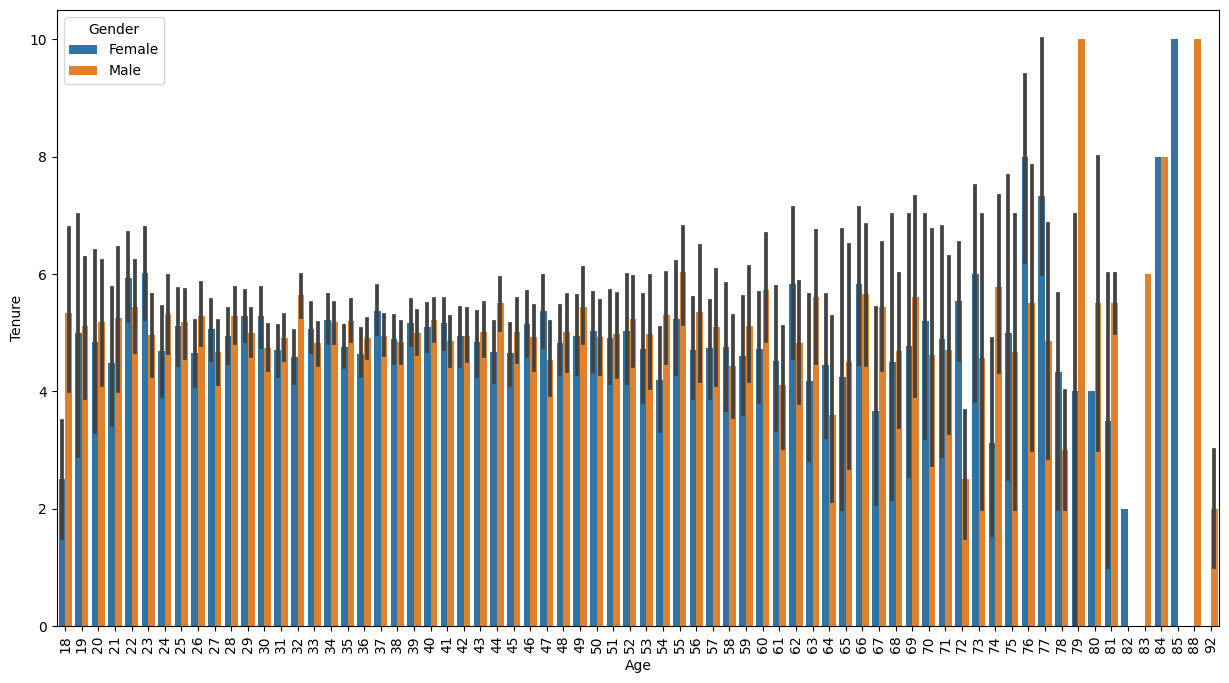

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='Tenure',hue='Gender',data= df)
plt.show()

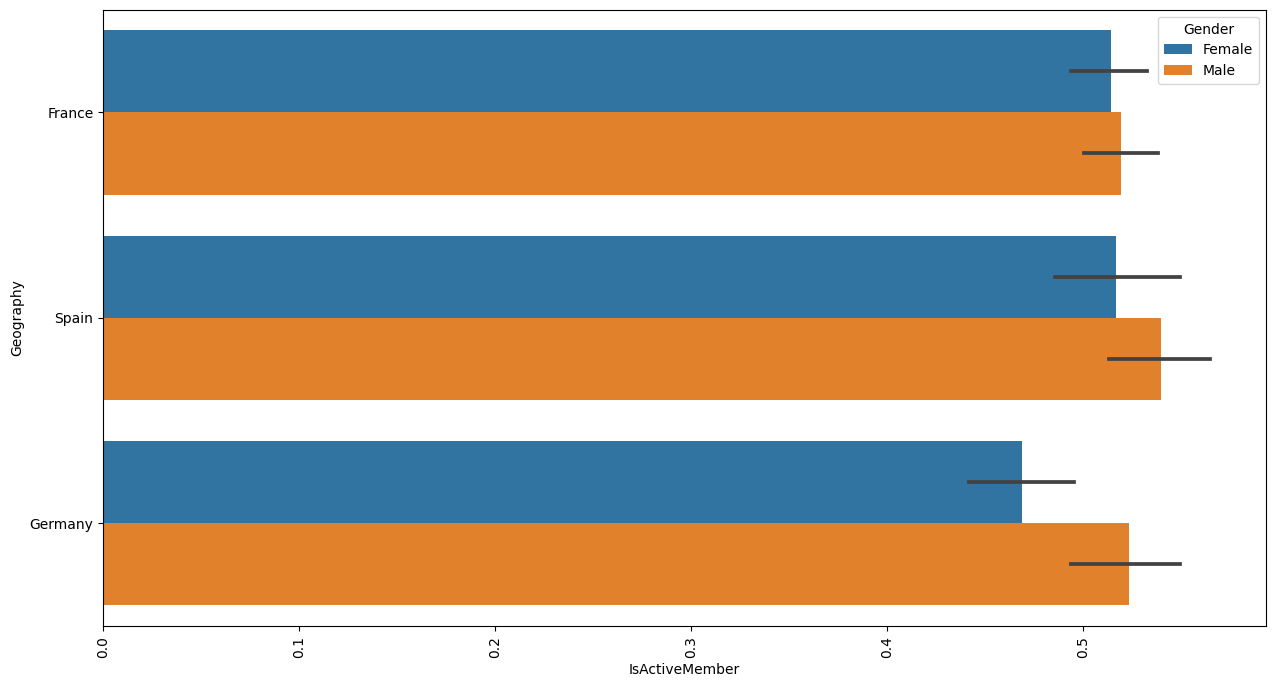

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='IsActiveMember',y='Geography',hue='Gender',data= df)
plt.show()

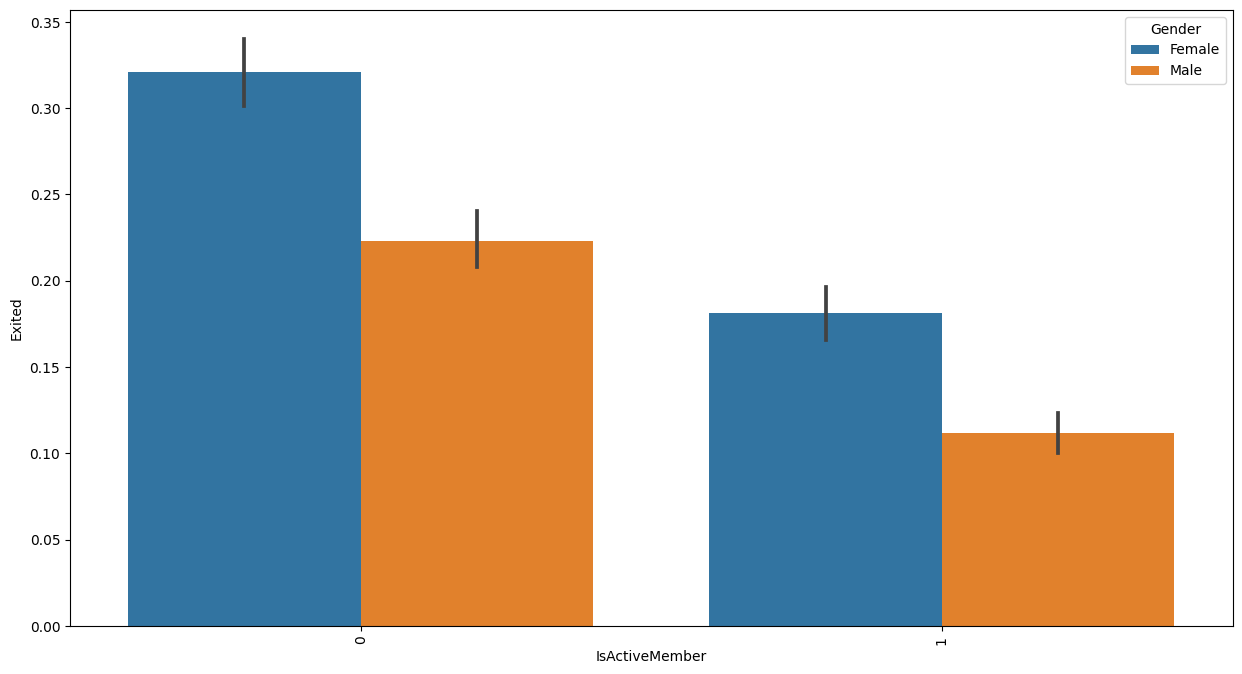

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='IsActiveMember',y='Exited',hue='Gender',data= df)
plt.show()

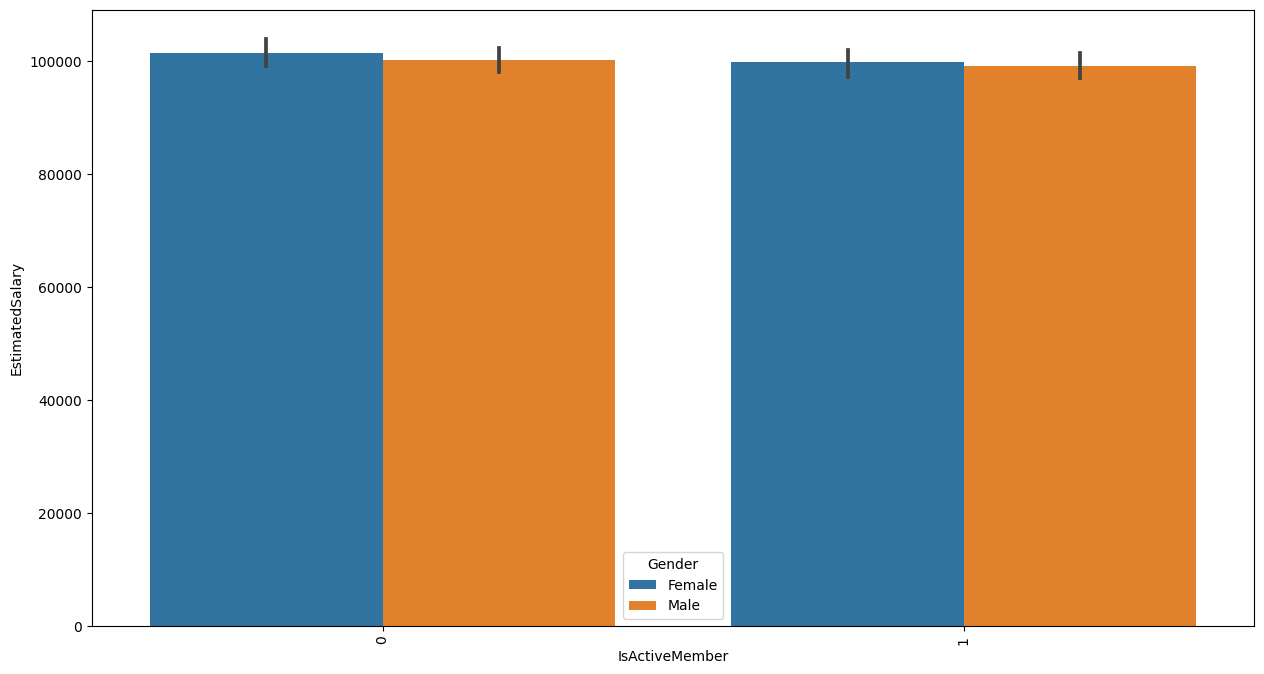

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='IsActiveMember',y='EstimatedSalary',hue='Gender',data= df)
plt.show()

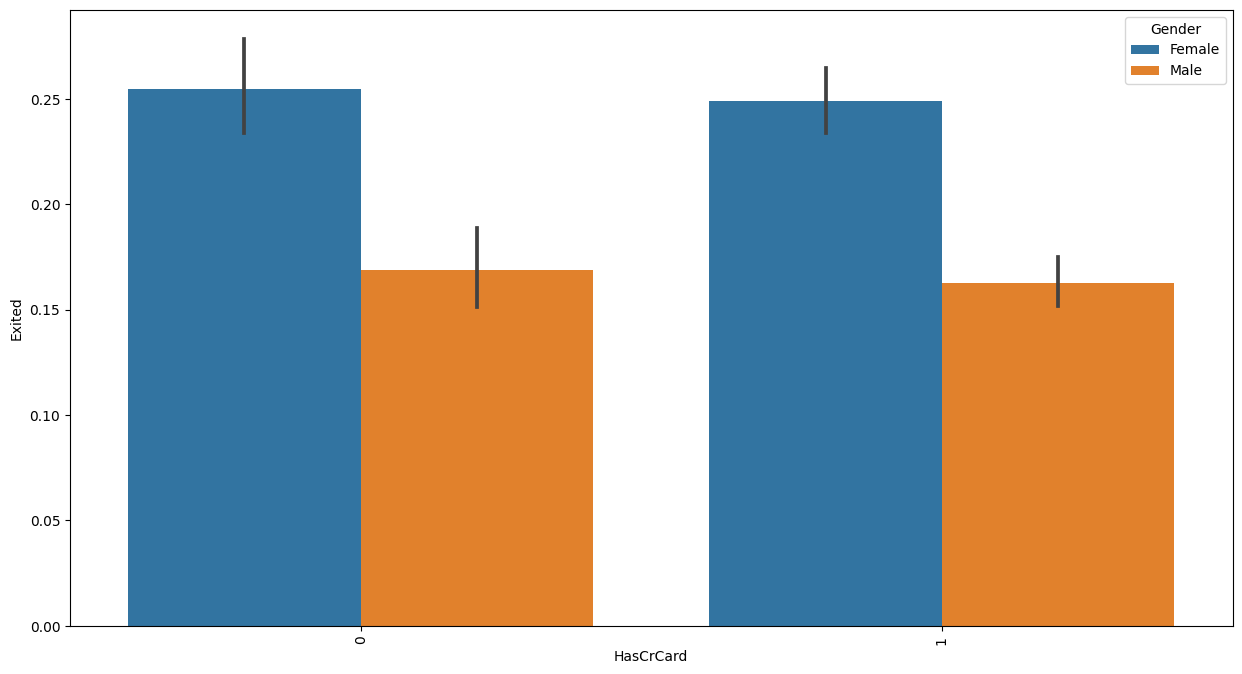

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='HasCrCard',y='Exited',hue='Gender',data= df)
plt.show()

# Label encoding

In [ ]:
cat_cols = ['Geography','Gender']
le = LabelEncoder()
for i in cat_cols :
  df[i] = le.fit_transform(df[i])
df.dtypes 

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.keys()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
df.shape

(10000, 11)

Distribution Plot

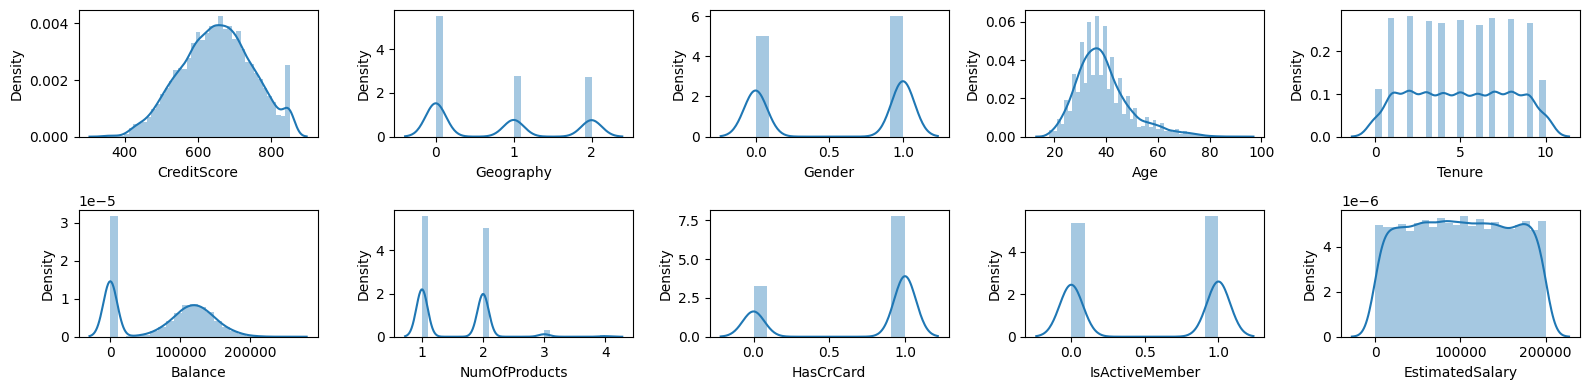

In [ ]:
rows =2 
cols =5
fig,ax= plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col = df.columns
index=0
for i in range(rows):
  for j in range(cols):
    sns.distplot(df[col[index]],ax=ax[i][j])
    index+=1
plt.tight_layout()

In [ ]:
X = df.drop(labels=['Exited'],axis=1)
Y = df['Exited']
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=40)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

# Logistic Regression

In [ ]:
LR = LogisticRegression()
# fit the model 
LR.fit(X_train,y_train)

#predict the train
train_pred = LR.predict(X_train)
#accuracy on train
AC = accuracy_score(y_train,train_pred)
print("Model accuracy on train is:",AC)

#predict the test
test_pred = LR.predict(X_test)
#accuracy on train
AC = accuracy_score(y_test,test_pred)
print("Model accuracy on test is:",AC)
print('-'*50)

print('ROC score on train is: ',roc_auc_score(y_train,train_pred))
print('ROC score on test is: ',roc_auc_score(y_test,test_pred))
print('-'*50)

# Confusion_Matrix
print("Confusion_Matrix train is: ",confusion_matrix(y_train,train_pred))
print("Confusion_Matrix test is: ",confusion_matrix(y_test,test_pred))
print('Wrong prediction out of total')
print('-'*50)

# Wrong prediction made 
print((y_test != test_pred).sum(),'/',((y_test == test_pred).sum()+(y_test !=test_pred).sum()))
print('-'*50)

#Kappa Score
print('KappaScore is:',metrics.cohen_kappa_score(y_test,test_pred))



Model accuracy on train is: 0.788
Model accuracy on test is: 0.8
--------------------------------------------------
ROC score on train is:  0.5196539781240042
ROC score on test is:  0.519866439768977
--------------------------------------------------
Confusion_Matrix train is:  [[6201  146]
 [1550  103]]
Confusion_Matrix test is:  [[1575   41]
 [ 359   25]]
Wrong prediction out of total
--------------------------------------------------
400 / 2000
--------------------------------------------------
KappaScore is: 0.05806111299498873


# Naive Bayes Classifiers

In [ ]:
NB = GaussianNB()
# fit the model 
NB.fit(X_train,y_train)

#predict the train
train_pred = NB.predict(X_train)
#accuracy on train
AC = accuracy_score(y_train,train_pred)
print("Model accuracy on train is:",AC)

#predict the test
test_pred = NB.predict(X_test)
#accuracy on train
AC = accuracy_score(y_test,test_pred)
print("Model accuracy on test is:",AC)
print('-'*50)

print('ROC score on train is: ',roc_auc_score(y_train,train_pred))
print('ROC score on test is: ',roc_auc_score(y_test,test_pred))
print('-'*50)

# Confusion_Matrix
print("Confusion_Matrix train is: ",confusion_matrix(y_train,train_pred))
print("Confusion_Matrix test is: ",confusion_matrix(y_test,test_pred))
print('Wrong prediction out of total')
print('-'*50)

# Wrong prediction made 
print((y_test != test_pred).sum(),'/',((y_test == test_pred).sum()+(y_test !=test_pred).sum()))
print('-'*50)

#Kappa Score
print('KappaScore is:',metrics.cohen_kappa_score(y_test,test_pred))



Model accuracy on train is: 0.781875
Model accuracy on test is: 0.7915
--------------------------------------------------
ROC score on train is:  0.5236234904696533
ROC score on test is:  0.5225479579207921
--------------------------------------------------
Confusion_Matrix train is:  [[6117  230]
 [1515  138]]
Confusion_Matrix test is:  [[1550   66]
 [ 351   33]]
Wrong prediction out of total
--------------------------------------------------
417 / 2000
--------------------------------------------------
KappaScore is: 0.0628876543875736


# Decision Tree Classifiers

In [ ]:
DT = DecisionTreeClassifier()
# fit the model 
DT.fit(X,Y)

#predict the train
train_pred = DT.predict(X_train)
#accuracy on train
AC = accuracy_score(y_train,train_pred)
print("Model accuracy on train is:",AC)

#predict the test
test_pred = DT.predict(X_test)
#accuracy on train
AC = accuracy_score(y_test,test_pred)
print("Model accuracy on test is:",AC)
print('-'*50)

print('ROC score on train is: ',roc_auc_score(y_train,train_pred))
print('ROC score on test is: ',roc_auc_score(y_test,test_pred))
print('-'*50)

# Confusion_Matrix
print("Confusion_Matrix train is: ",confusion_matrix(y_train,train_pred))
print("Confusion_Matrix test is: ",confusion_matrix(y_test,test_pred))
print('Wrong prediction out of total')
print('-'*50)

# Wrong prediction made 
print((y_test != test_pred).sum(),'/',((y_test == test_pred).sum()+(y_test !=test_pred).sum()))
print('-'*50)

#Kappa Score
print('KappaScore is:',metrics.cohen_kappa_score(y_test,test_pred))



Model accuracy on train is: 1.0
Model accuracy on test is: 1.0
--------------------------------------------------
ROC score on train is:  1.0
ROC score on test is:  1.0
--------------------------------------------------
Confusion_Matrix train is:  [[6347    0]
 [   0 1653]]
Confusion_Matrix test is:  [[1616    0]
 [   0  384]]
Wrong prediction out of total
--------------------------------------------------
0 / 2000
--------------------------------------------------
KappaScore is: 1.0


# Random Forest Classifiers

In [ ]:
RF = RandomForestClassifier()
# fit the model 
RF.fit(X_train,y_train)

#predict the train
train_pred = RF.predict(X_train)
#accuracy on train
AC = accuracy_score(y_train,train_pred)
print("Model accuracy on train is:",AC)

#predict the test
test_pred = RF.predict(X_test)
#accuracy on train
AC = accuracy_score(y_test,test_pred)
print("Model accuracy on test is:",AC)
print('-'*50)

print('ROC score on train is: ',roc_auc_score(y_train,train_pred))
print('ROC score on test is: ',roc_auc_score(y_test,test_pred))
print('-'*50)

# Confusion_Matrix
print("Confusion_Matrix train is: ",confusion_matrix(y_train,train_pred))
print("Confusion_Matrix test is: ",confusion_matrix(y_test,test_pred))
print('Wrong prediction out of total')
print('-'*50)

# Wrong prediction made 
print((y_test != test_pred).sum(),'/',((y_test == test_pred).sum()+(y_test !=test_pred).sum()))
print('-'*50)

#Kappa Score
print('KappaScore is:',metrics.cohen_kappa_score(y_test,test_pred))



Model accuracy on train is: 1.0
Model accuracy on test is: 0.8725
--------------------------------------------------
ROC score on train is:  1.0
ROC score on test is:  0.7305074257425742
--------------------------------------------------
Confusion_Matrix train is:  [[6347    0]
 [   0 1653]]
Confusion_Matrix test is:  [[1553   63]
 [ 192  192]]
Wrong prediction out of total
--------------------------------------------------
255 / 2000
--------------------------------------------------
KappaScore is: 0.5287203371035707


# K-Nearst Neighbours

In [ ]:
KNN = KNeighborsClassifier()
# fit the model 
KNN.fit(X_train,y_train)

#predict the train
train_pred = KNN.predict(X_train)
#accuracy on train
AC = accuracy_score(y_train,train_pred)
print("Model accuracy on train is:",AC)

#predict the test
test_pred = KNN.predict(X_test)
#accuracy on train
AC = accuracy_score(y_test,test_pred)
print("Model accuracy on test is:",AC)
print('-'*50)

print('ROC score on train is: ',roc_auc_score(y_train,train_pred))
print('ROC score on test is: ',roc_auc_score(y_test,test_pred))
print('-'*50)

# Confusion_Matrix
print("Confusion_Matrix train is: ",confusion_matrix(y_train,train_pred))
print("Confusion_Matrix test is: ",confusion_matrix(y_test,test_pred))
print('Wrong prediction out of total')
print('-'*50)

# Wrong prediction made 
print((y_test != test_pred).sum(),'/',((y_test == test_pred).sum()+(y_test !=test_pred).sum()))
print('-'*50)

#Kappa Score
print('KappaScore is:',metrics.cohen_kappa_score(y_test,test_pred))



Model accuracy on train is: 0.8105
Model accuracy on test is: 0.7705
--------------------------------------------------
ROC score on train is:  0.5935625969407309
ROC score on test is:  0.5085602310231023
--------------------------------------------------
Confusion_Matrix train is:  [[6114  233]
 [1283  370]]
Confusion_Matrix test is:  [[1509  107]
 [ 352   32]]
Wrong prediction out of total
--------------------------------------------------
459 / 2000
--------------------------------------------------
KappaScore is: 0.022622353201710355


# SVM

In [ ]:
# SVM = SVC(kernel='linear')
# # fit the model 
# SVM.fit(X_train,y_train)

# #predict the train
# train_pred = SVM.predict(X_train)
# #accuracy on train
# AC = accuracy_score(y_train,train_pred)
# print("Model accuracy on train is:",AC)

# #predict the test
# test_pred = SVM.predict(X_test)
# #accuracy on train
# AC = accuracy_score(y_test,test_pred)
# print("Model accuracy on test is:",AC)
# print('-'*50)

# print('ROC score on train is: ',roc_auc_score(y_train,train_pred))
# print('ROC score on test is: ',roc_auc_score(y_test,test_pred))
# print('-'*50)

# # Confusion_Matrix
# print("Confusion_Matrix train is: ",confusion_matrix(y_train,train_pred))
# print("Confusion_Matrix test is: ",confusion_matrix(y_test,test_pred))
# print('Wrong prediction out of total')
# print('-'*50)

# # Wrong prediction made 
# print((y_test != test_pred).sum(),'/',((y_test == test_pred).sum()+(y_test !=test_pred).sum()))
# print('-'*50)

# #Kappa Score
# print('KappaScore is:',metrics.cohen_kappa_score(y_test,test_pred))



XG-Boost Classifier

In [ ]:
XGB = xgb.XGBClassifier()
# fit the model 
XGB.fit(X_train,y_train)

#predict the train
train_pred = XGB.predict(X_train)
#accuracy on train
AC = accuracy_score(y_train,train_pred)
print("Model accuracy on train is:",AC)

#predict the test
test_pred = XGB.predict(X_test)
#accuracy on train
AC = accuracy_score(y_test,test_pred)
print("Model accuracy on test is:",AC)
print('-'*50)

print('ROC score on train is: ',roc_auc_score(y_train,train_pred))
print('ROC score on test is: ',roc_auc_score(y_test,test_pred))
print('-'*50)

# Confusion_Matrix
print("Confusion_Matrix train is: ",confusion_matrix(y_train,train_pred))
print("Confusion_Matrix test is: ",confusion_matrix(y_test,test_pred))
print('Wrong prediction out of total')
print('-'*50)

# Wrong prediction made 
print((y_test != test_pred).sum(),'/',((y_test == test_pred).sum()+(y_test !=test_pred).sum()))
print('-'*50)

#Kappa Score
print('KappaScore is:',metrics.cohen_kappa_score(y_test,test_pred))



Model accuracy on train is: 0.957375
Model accuracy on test is: 0.867
--------------------------------------------------
ROC score on train is:  0.9046838082041132
ROC score on test is:  0.7469575082508251
--------------------------------------------------
Confusion_Matrix train is:  [[6312   35]
 [ 306 1347]]
Confusion_Matrix test is:  [[1522   94]
 [ 172  212]]
Wrong prediction out of total
--------------------------------------------------
266 / 2000
--------------------------------------------------
KappaScore is: 0.5353679327017131


# Hyper Parameter Tuning

In [ ]:
RF = RandomForestClassifier(n_estimators=500,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',random_state=235,verbose=2,max_samples=50)
# fit the model 
RF.fit(X_train,y_train)

#predict the train
train_pred = RF.predict(X_train)
#accuracy on train
AC = accuracy_score(y_train,train_pred)
print("Model accuracy on train is:",AC)

#predict the test
test_pred = RF.predict(X_test)
#accuracy on train
AC = accuracy_score(y_test,test_pred)
print("Model accuracy on test is:",AC)
print('-'*50)

print('ROC score on train is: ',roc_auc_score(y_train,train_pred))
print('ROC score on test is: ',roc_auc_score(y_test,test_pred))
print('-'*50)

# Confusion_Matrix
print("Confusion_Matrix train is: ",confusion_matrix(y_train,train_pred))
print("Confusion_Matrix test is: ",confusion_matrix(y_test,test_pred))
print('Wrong prediction out of total')
print('-'*50)

# Wrong prediction made 
print((y_test != test_pred).sum(),'/',((y_test == test_pred).sum()+(y_test !=test_pred).sum()))
print('-'*50)

#Kappa Score
print('KappaScore is:',metrics.cohen_kappa_score(y_test,test_pred))



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Model accuracy on train is: 0.817375
Model accuracy on test is: 0.833
--------------------------------------------------
ROC score on train is:  0.5627739872818145
ROC score on test is:  0.5720529084158417
--------------------------------------------------
Confusion_Matrix train is:  [[6326   21]
 [1440  213]]
Confusion_Matrix test is:  [[1609    7]
 [ 327   57]]
Wrong prediction out of total
--------------------------------------------------
334 / 2000
--------------------------------------------------
KappaScore is: 0.21119256348246673


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
